In [7]:
import numpy as np
from scipy.stats import beta
from pathlib import Path
%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
# add utilities directory to path
import os, sys
util_path = os.path.abspath(os.path.join(os.path.pardir, 'utilities_and_data'))
if util_path not in sys.path and os.path.exists(util_path):
    sys.path.insert(0, util_path)

# import from utilities
import plot_tools

## Data

In [13]:
# obs=[0, 1, 1, 0, 0, 0]
obs=Path('data/algae.txt').read_text().split('\n')
obs=[int(o) for o in obs if o!='']

Let π be the probability of a monitoring site having detectable blue-green algae levels and y the
observations in algae. Use a binomial model for the observations y and a Beta(2, 10) prior for
binomial model parameter π to formulate a Bayesian model. Here it is not necessary to derive
the posterior distribution for π as it has already been done in the book and it suffices to refer
to that derivation. Also, it is not necessary to write out the distributions; it is sufficient to use
label-parameter format, e.g. Beta(·, ·).

Your task is to make Bayesian inference for binomial model and answer questions based on it:

a) formulate (1) the likelihood p(y|π) as a function of π, (2) the prior p(π), and (3) the resulting
posterior p(π|y). Report the posterior in the format Beta(·, ·), where you replace ·’s with the
correct numerical values.


## Posterior

In [14]:
#prior
#beta(2, 10)
alpha_pr=2
beta_pr=10

#posterior
#beta(2+y, 10+n-y)
y=sum(obs)
n=len(obs)
alpha_post=alpha_pr+y
beta_post=beta_pr+n-y
alpha_post, beta_post

(46, 240)

## Point estimate and credible interval

What can you say about the value of the unknown π according to the observations and your
prior knowledge? Summarize your results with a point estimate (i.e. E(π|y)) and a 90%
posterior interval. Note! Posterior intervals are also called credible intervals and are different
from confidence intervals

In [55]:
#point estimate
pii_mean=(alpha_pr+y)/(alpha_pr+beta_pr+n)
round(pii_mean, 3)

0.161

In [48]:
conf_level=0.9
interval_upper=beta.ppf(conf_level+(1-conf_level)/2, alpha_post, beta_post)
inteval_lower=beta.ppf((1-conf_level)/2, alpha_post, beta_post)

In [54]:
 round(inteval_lower, 2), round(interval_upper,2)

(0.2, 0.13)

## Probability that pii is smaller than some value

What is the probability that the proportion of monitoring sites with detectable algae levels π is
smaller than π0 = 0.2 that is known from historical records?

In [57]:
beta.cdf(0.2, alpha_post, beta_post)

0.9586135871948529

What assumptions are required in order to use this kind of a model with this type of data?

We are assuming that the presence of detectable algae levels are conditionally independent given
, with the probability of presence equal to  for all cases.

## Sensitivity

Make prior sensitivity analysis by testing a couple of different reasonable priors and plot the
different posteriors. Summarize the results by one or two sentences

In [73]:
#grid
x = np.linspace(0.0, 0.3, 150)

In [88]:
pdu = beta.pdf(x, alpha_post, beta_post)

# compare 3 cases
# arrays of different priors:
# Beta(0.485*n, (1-0.485)*n), for n = 2, 20, 200
ap = np.array([alpha_pr * (2*2**i) for i in range(3)])
bp = np.array([(beta_pr) * (2*2**i) for i in range(3)])
# corresponding posteriors with data (437,543)
ai = alpha_post + ap
bi = beta_post + bp
# calculate prior and posterior densities
pdp = beta.pdf(x, ap[:,np.newaxis], bp[:,np.newaxis])
pdi = beta.pdf(x, ai[:,np.newaxis], bi[:,np.newaxis])

In [89]:
ap

array([ 4,  8, 16])

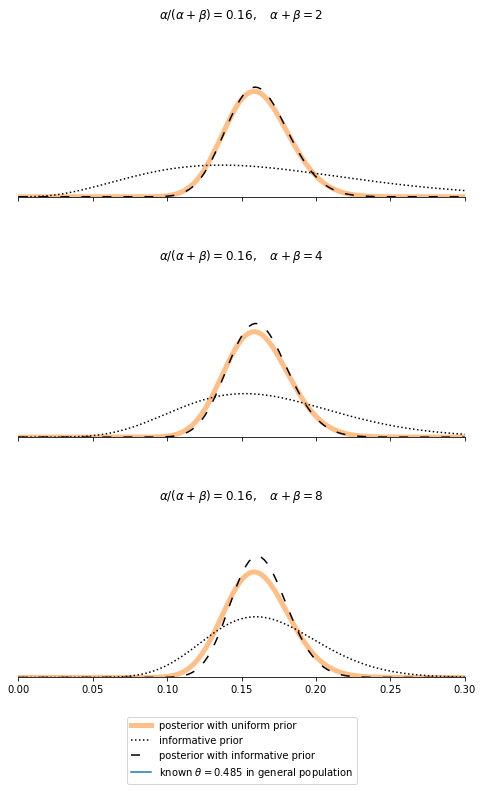

In [90]:
# plot 3 subplots
fig, axes = plt.subplots(
    nrows=3, ncols=1, sharex=True, sharey=True, figsize=(8, 12))
# show only x-axis
plot_tools.modify_axes.only_x(axes)
# manually adjust spacing
fig.subplots_adjust(hspace=0.4)

# 3 subplots
for i, ax in enumerate(axes):
    # plot three precalculated densities
    post1, = ax.plot(x, pdu, color=plot_tools.lighten('C1'), linewidth=5)
    prior, = ax.plot(x, pdp[i], 'k:')
    post2, = ax.plot(x, pdi[i], color='k', dashes=(6, 8))
    # add vertical line
    #known = ax.axvline(0.485, color='C0')
    # set the title for this subplot
    ax.set_title(
        r'$\alpha/(\alpha+\beta) = 0.16,\quad \alpha+\beta = {}$'
        .format(2*2**i)
    )
# limit x-axis
axes[0].autoscale(axis='x', tight=True)
axes[0].set_ylim((0,30))
# add legend to the last subplot
axes[-1].legend(
    (post1, prior, post2, known),
    ( 'posterior with uniform prior',
      'informative prior',
      'posterior with informative prior',
     r'known $\theta=0.485$ in general population'),
    loc='upper center',
    bbox_to_anchor=(0.5, -0.2)
);